# Baseline

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [270]:
root = "../models/"
models = ["baseline", "fovnetV1", "baseline2", "multiRes", "fovnetV2", "Cartesian", ]
models = [root + model for model in models]
names = ["Most Salient: Uniform", "Most Salient: Polar-Retinal",
         "Top-3 Salient: Uniform", "Top-3 Salient: Multi-Resolution",
         "Top-3 Salient: Polar-Retinal", "Top-3 Salient: Cartesian-Retinal"]

models = [root + "baselineV2/archive_clipped", root + "fovnetV2/archive_clipped", root + "multiRes/archive_clipped",
         root+"Cartesian"]
names = ["Baseline", "Polar", "MultiRes", "Cartesian"]
train = [model + "/training.out" for model in models]
test = [model + "/test.out" for model in models]

In [271]:
def process(train_name, test_name, name):
    df_train = pd.read_csv(train_name, header=None, sep="\t")
    df_test = pd.read_csv(test_name, header=None, sep="\t")

    df_test["Top 1"] = df_test[3].apply(lambda x: x.strip().split()[1]).astype(float)
    df_test["Top 5"] = df_test[4].apply(lambda x: x.strip().split()[1]).astype(float)

    df_train["Top 1"] = df_train[4].apply(lambda x: x.strip().split()[1]).astype(float)
    df_train["Top 5"] = df_train[5].apply(lambda x: x.strip().split()[1]).astype(float)

    def get_accuracy(df, train=True):
        i = 1
        top5_acc = []
        top1_acc = []
        top5_total = 0
        top1_total = 0
        if train:
            flags = ["[   0/5005]", "[    0/10009]"]
#             flag = "[5000/5005]"
        else:
            flags = ["[  0/196]", "[  0/391]"]
#             flag = "[190/196]"
        for index, row in df.iterrows():
            if (any([flag in row[0] for flag in flags])):
                top1_acc.append(top1_total/i)
                top5_acc.append(top5_total/i)
#                 top1_acc.append(row["Top 1"])
#                 top5_acc.append(row["Top 5"])
                top1_total = 0
                top5_total = 0
                i = 0


            top1_total += row["Top 1"]
            top5_total += row["Top 5"]
            i += 1
        return top1_acc[1:], top5_acc[1:]
    
    top1_train, top5_train = get_accuracy(df_train, train = True)
    top1_test, top5_test = get_accuracy(df_test, train = False)
    
    return {"top1":{"train":top1_train, "test":top1_test}, "top5":{"train":top5_train, "test":top5_test}}

In [272]:
top5_train = []
top5_test = []
top1_train = []
top1_test = []
for i in range(len(models)):
    vals = process(train[i], test[i], names[i])
    top5_train.append(vals["top5"]["train"])
    top5_test.append(vals["top5"]["test"])
    top1_train.append(vals["top1"]["train"])
    top1_test.append(vals["top1"]["test"])

In [273]:
c = []
for _ in models:
    c.append(np.random.rand(3,))

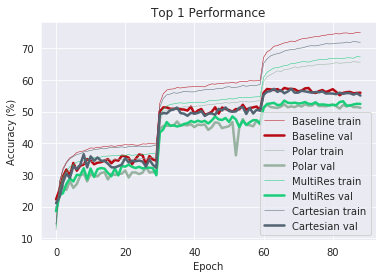

In [274]:
top1 = list(zip(top1_train, top1_test))
for i, (train, test) in enumerate(top1):
    plt.plot(train, linewidth=0.5, c=c[i], label=names[i] + " train")
    plt.plot(test, linewidth=2.5, c=c[i], label=names[i] + " val")

# plt.legend(names)
plt.legend(loc="lower right")
plt.title("Top 1 Performance")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

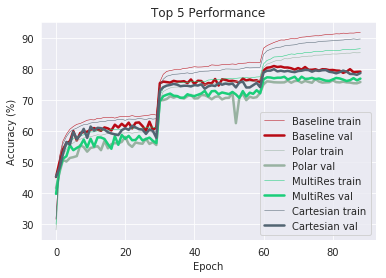

In [275]:
top5 = list(zip(top5_train, top5_test))
for i, (train, test) in enumerate(top5):
    plt.plot(train, linewidth=0.5, c=c[i], label=names[i] + " train")
    plt.plot(test, linewidth=2.5, c=c[i], label=names[i] + " val")

# plt.legend(names)
plt.legend(loc = "lower right")
plt.title("Top 5 Performance")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

# Overfit (Train - Test)

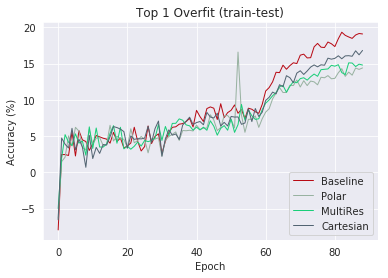

In [276]:
top1 = list(zip(top1_train, top1_test))
for i, (train, test) in enumerate(top1):
    if len(train) != len(test):
        minlen = min(len(train), len(test))
        print(minlen)
        train = train[:minlen]
        test = test[:minlen]
    diff = np.array(train)-np.array(test)
    plt.plot(diff, linewidth=1, c=c[i], label=names[i])

# plt.legend(names)
plt.legend(loc="lower right")
plt.title("Top 1 Overfit (train-test)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

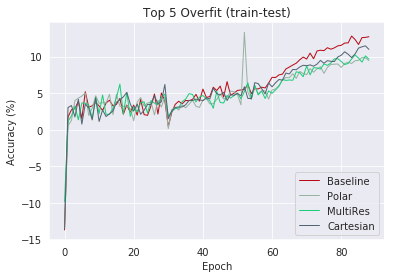

In [277]:
top5 = list(zip(top5_train, top5_test))
for i, (train, test) in enumerate(top5):
    if len(train) != len(test):
        minlen = min(len(train), len(test))
        print(minlen)
        train = train[:minlen]
        test = test[:minlen]
    diff = np.array(train)-np.array(test)
    plt.plot(diff, linewidth=1, c=c[i], label=names[i])

# plt.legend(names)
plt.legend(loc="lower right")
plt.title("Top 5 Overfit (train-test)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

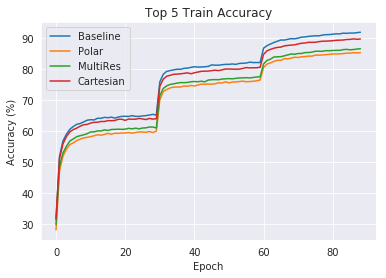

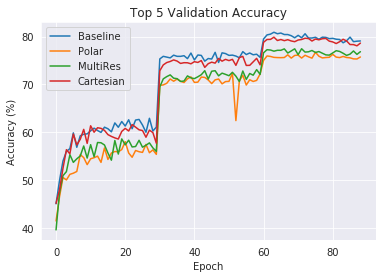

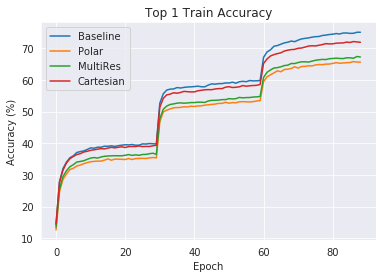

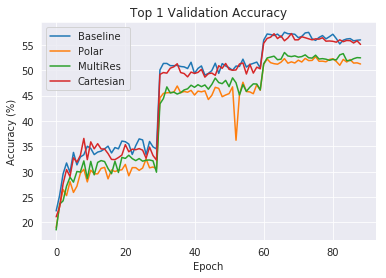

In [278]:
records = {"top5": {}, "top1": {}}
for i in top5_train:
    plt.plot(i)
    
plt.legend(names)
plt.title("Top 5 Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

for i,v  in enumerate(top5_test):
    plt.plot(v)
    records["top5"][names[i]] = max(v)
    
plt.legend(names)
plt.title("Top 5 Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

for i in top1_train:
    plt.plot(i)
    
plt.legend(names)
plt.title("Top 1 Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

for i,v in enumerate(top1_test):
    plt.plot(v)
    records["top1"][names[i]] = max(v)

    
plt.legend(names)
plt.title("Top 1 Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)");

In [279]:
records

{'top5': {'Baseline': 80.895,
  'Polar': 76.7115,
  'MultiRes': 77.45350000000003,
  'Cartesian': 79.86724999999998},
 'top1': {'Baseline': 57.46525000000001,
  'Polar': 52.64525000000002,
  'MultiRes': 53.47275,
  'Cartesian': 57.211}}